In [2]:
import copy
import linecache
import os
import pickle
from itertools import product
from time import gmtime, process_time, strftime

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
from scipy.optimize import curve_fit
from scipy.stats import zscore

from util_functions import * 

distance    = 831.
e_distance  = 11.

df_photometry = pd.read_csv('data/example_photomety_file.csv', engine='python')
star_list     = df_photometry.name

# Single star fitting - Example 1
Using Kurucz model

## Initializing a SingleStar object

In [3]:
cycle=1
star  = SingleStar(name            = 'WOCS2002',                           # name of the star
                   model_to_fit    = 'Kurucz',                 # model names same as in "models" folder
                   dir_obs         = 'data/extinction_corrected_flux_files/',             # location of observed SED files
                   distance        = distance,                               # distance in pc
                   distance_err    = e_distance,                                 # distance error in pc
                   free_para       = 2,                                    # number of free parameters
                   filters_to_drop = [],   # list of filters not to be fitted 
                   verbose         = True)

WOCS2002
----------------


## Reading observed flux and model files

In [4]:
star.read_observed_SED(verbose=True)
star.fit_blackbody(cycle, p0=[5000.,-20], 
                   plot=True, save_plot=True, show_plot=False, verbose=False, folder_path='plots/single_SEDs/')
star.read_model_file(verbose=False)


    RUNNING: drop_filters
              not_fitted         to_be_fitted
wavelength                                   
1481.000000               Astrosat/UVIT.F148W
1541.000000               Astrosat/UVIT.F154W
1608.000000               Astrosat/UVIT.F169M
2303.366368                   GALEX/GALEX.NUV
4357.276538                     KPNO/Mosaic.B
5035.750275                    GAIA/GAIA3.Gbp
5366.240786                     KPNO/Mosaic.V
5822.388714                      GAIA/GAIA3.G
7619.959993                    GAIA/GAIA3.Grp
8101.609574                     KPNO/Mosaic.I
8578.159519                   GAIA/GAIA3.Grvs
12350.000000                    2MASS/2MASS.J
16620.000000                    2MASS/2MASS.H
21590.000000                   2MASS/2MASS.Ks
33526.000000                     WISE/WISE.W1
46028.000000                     WISE/WISE.W2
115608.000000                    WISE/WISE.W3
    Filters to fit: 17

    RUNNING: read_observed_SED
    Total filters: 17


## Limiting the parameter space and preparation for SED fitting

In [5]:
# keep the sequence and names same as coordinates in the model flux file
limits = {'Te'   : [3500, 9000],
          'logg' : [3.0, 5],
          'MH'   : [0.0, 0.0],
          'alpha': [0.0, 0.0]}
star.constrain_fitting_parameters(limits,verbose=False)
star.create_sf_list(log_sf_flexibility=3., log_sf_stepsize=0.01)    

## Chi2 fitting and plotting


    Fitting parameters: T=5250,logg=4.50,MH=0.00,alpha=0.0,sf=2.09e-20,R=5.328408,L=19.431089 with chi2=1438.90


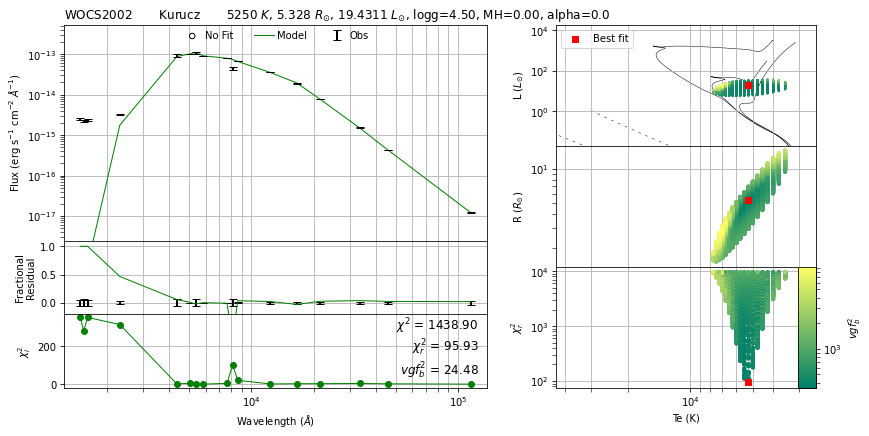

In [6]:
star.calculate_chi2(cycle, refit=False,verbose=False)
star.get_parameters_from_chi2_minimization(verbose=True)
star.plot_fitted_SED(cycle, save_plot=True, show_plot=True, folder_path='plots/single_SEDs/')

## Chi2 fitting with noisy flux for statistical error estimation

    Calculating noisy chi2:  99/100  (99%)
    Fitting parameters from noisy iterations:
        Te   = 5250 (+250-250)
        logg = 4.50 (+0.50-0.50)
        MH   = 0.00 (+nan-nan)
        alpha= 0.00 (+nan-nan)
        sf   = 2.09e-20 (+4.76e-22-4.87e-22)
        R    = 5.3284 (+0.0932-0.0937)
        L    = 19.4311 (+4.0326-4.8320)
        chi2 = 1438.9, vgf2 = 94.0, vgfb2 = 24.5
    Saving log in log_single_fitting.csv


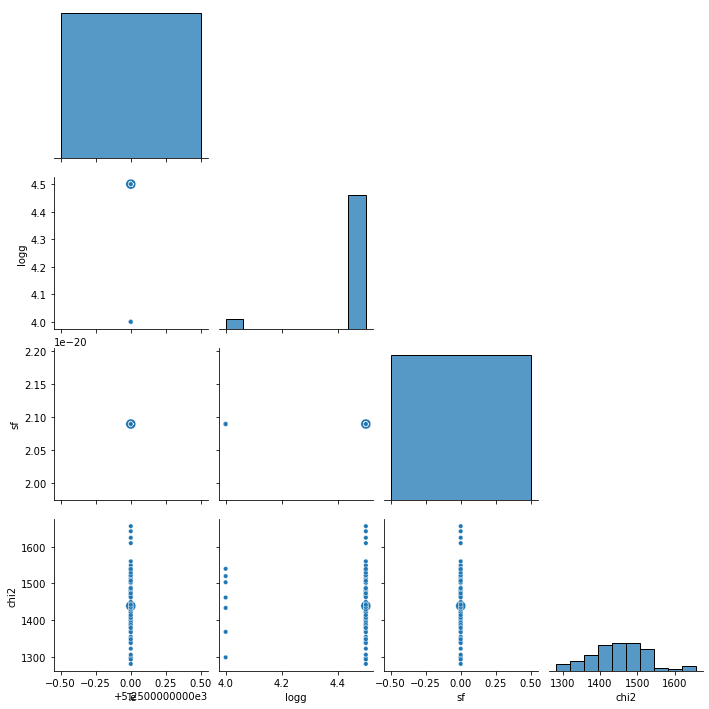

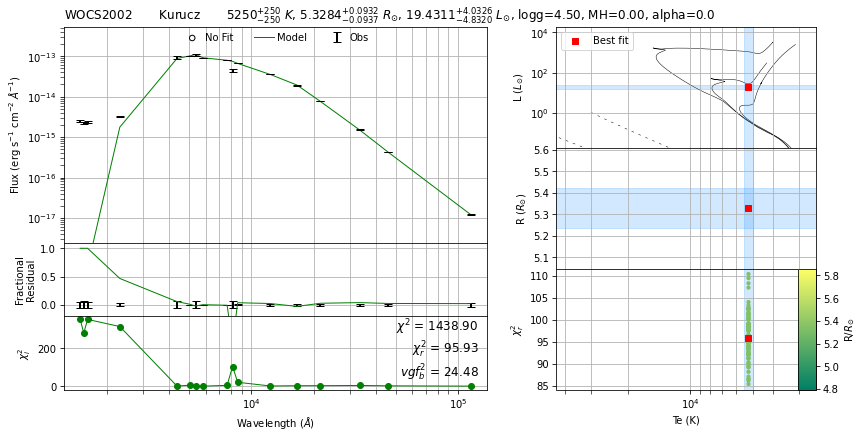

In [7]:
star.calculate_chi2_noisy(cycle, total_iterations=100, plot=True, refit=True)
star.get_parameters_from_noisy_chi2(verbose=True)
star.plot_fitted_noisy_SED(cycle, plot_noisy_SEDs=False, save_plot=True)
star.save_object(cycle, save_log=True)

# Single star fitting - ***Less verbose*** Example 2
Using Koester model


    RUNNING: drop_filters
                  not_fitted         to_be_fitted
wavelength                                       
1481.000000                   Astrosat/UVIT.F148W
1541.000000                   Astrosat/UVIT.F154W
1608.000000                   Astrosat/UVIT.F169M
2303.366368                       GALEX/GALEX.NUV
3630.255003    KPNO/Mosaic.U                     
4357.276538                         KPNO/Mosaic.B
5035.750275                        GAIA/GAIA3.Gbp
5366.240786                         KPNO/Mosaic.V
5822.388714                          GAIA/GAIA3.G
7619.959993                        GAIA/GAIA3.Grp
12350.000000   2MASS/2MASS.J                     
16620.000000   2MASS/2MASS.H                     
21590.000000  2MASS/2MASS.Ks                     
33526.000000    WISE/WISE.W1                     
46028.000000    WISE/WISE.W2                     
    Filters to fit: 9

    RUNNING: read_observed_SED
    Total filters: 15
    Calculating noisy chi2:  99/100  (99%)    W

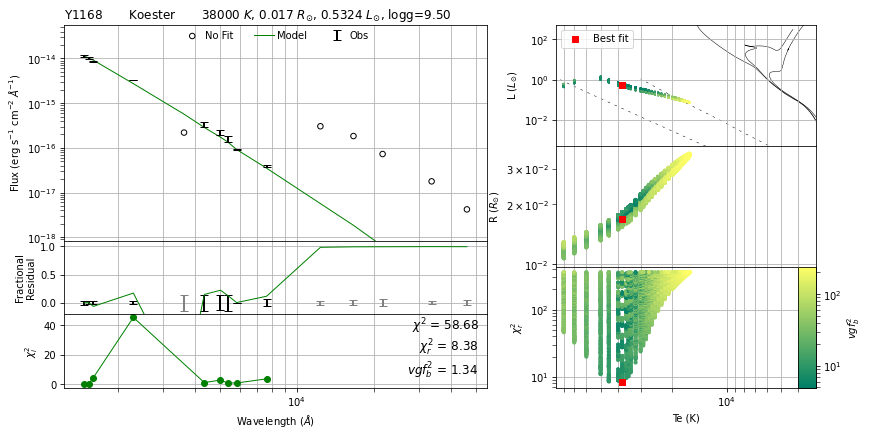

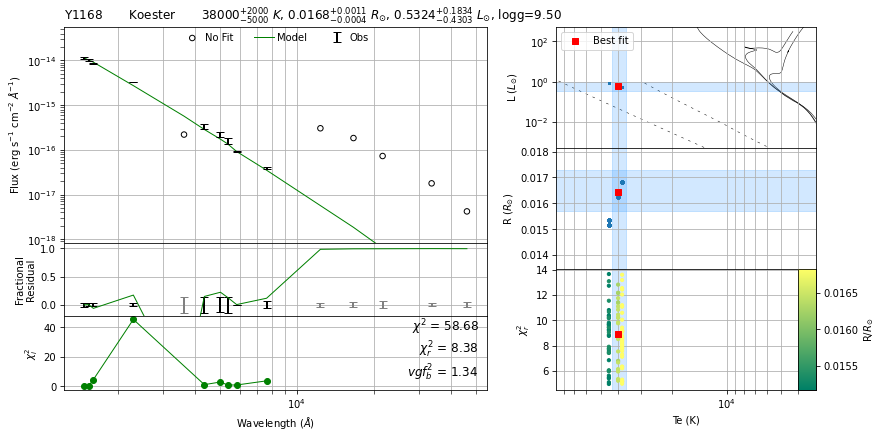

In [7]:
cycle = 1
star  = SingleStar(name           = 'Y1168',                           # name of the star
                  model_to_fit    = 'Koester',                 # model names same as in "models" folder
                  dir_obs         = 'data/extinction_corrected_flux_files/',             # location of observed SED files
                  distance        = 831.,                               # distance in pc
                  distance_err    = 11.,                                 # distance error in pc
                  free_para       = 2,                                    # number of free parameters
                  filters_to_drop = ['KPNO/Mosaic.U','2MASS/2MASS.J','2MASS/2MASS.H','2MASS/2MASS.Ks','WISE/WISE.W1','WISE/WISE.W2'])   # list of filters not to be fitted 

star.read_observed_SED(verbose=True)
star.fit_blackbody(cycle,p0=[10000.,-20])
star.read_model_file()

# keep the sequence and names same as coordinates in the model flux file
limits = {'Te'  :[10000, 80000],
          'logg':[6.5, 9.5]}

star.constrain_fitting_parameters(limits)
star.create_sf_list()

star.calculate_chi2(cycle, refit=True)
star.get_parameters_from_chi2_minimization()
star.plot_fitted_SED(cycle)

star.calculate_chi2_noisy(cycle, refit=True)
star.get_parameters_from_noisy_chi2()
star.plot_fitted_noisy_SED(cycle, plot_noisy_SEDs=False)
star.save_object(cycle)